In [1]:
# ggplot2パッケージのインストールと読み込み
install.packages("ggplot2")
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# CSVファイルの読み込み
body.data <- read.csv("../data/body.csv", header=T, stringsAsFactors=F)
head(body.data)

height,weight,gender
<dbl>,<dbl>,<chr>
178.2,80.3,Male
164.4,59.8,Male
163.1,57.3,Male
164.9,45.1,NA
153.5,43.7,Female
167.7,58.6,Female


In [12]:
# 数値要約の実行
summary(body.data)
# 標準偏差と不偏分散の実行
sd(body.data$height)
var(body.data$height)

     height          weight         gender         
 Min.   :153.5   Min.   :43.70   Length:6          
 1st Qu.:163.4   1st Qu.:48.15   Class :character  
 Median :164.7   Median :57.95   Mode  :character  
 Mean   :165.3   Mean   :57.47                     
 3rd Qu.:167.0   3rd Qu.:59.50                     
 Max.   :178.2   Max.   :80.30                     

[1] 7.965174

[1] 63.444

In [10]:
# データフレーム の基本操作
body.data[, 2] # 列番号を指定して取得
body.data[, c(1,3)] # 複数の列番号を指定して取得
body.data[, "weight"] # 列名で取得
body.data$weight # $列名でも取れる
body.data[, c("height", "weight")]

body.data[body.data$gender=="Female",] # 条件にあった行だけ取り出す
body.data[order(body.data$height),] # 昇順でソート
body.data[order(body.data$height, decreasing=T),] # 降順でソート

[1] 80.3 59.8 57.3 45.1 43.7 58.6

height,gender
<dbl>,<chr>
178.2,Male
164.4,Male
163.1,Male
164.9,NA
153.5,Female
167.7,Female


[1] 80.3 59.8 57.3 45.1 43.7 58.6

[1] 80.3 59.8 57.3 45.1 43.7 58.6

height,weight
<dbl>,<dbl>
178.2,80.3
164.4,59.8
163.1,57.3
164.9,45.1
153.5,43.7
167.7,58.6


,height,weight,gender
,<dbl>,<dbl>,<chr>
NA,NA,NA,NA
5,153.5,43.7,Female
6,167.7,58.6,Female


,height,weight,gender
,<dbl>,<dbl>,<chr>
5,153.5,43.7,Female
3,163.1,57.3,Male
2,164.4,59.8,Male
4,164.9,45.1,NA
6,167.7,58.6,Female
1,178.2,80.3,Male


,height,weight,gender
,<dbl>,<dbl>,<chr>
1,178.2,80.3,Male
6,167.7,58.6,Female
4,164.9,45.1,NA
2,164.4,59.8,Male
3,163.1,57.3,Male
5,153.5,43.7,Female


In [47]:
body.data <- na.omit(body.data) # NA を含む行を削除

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


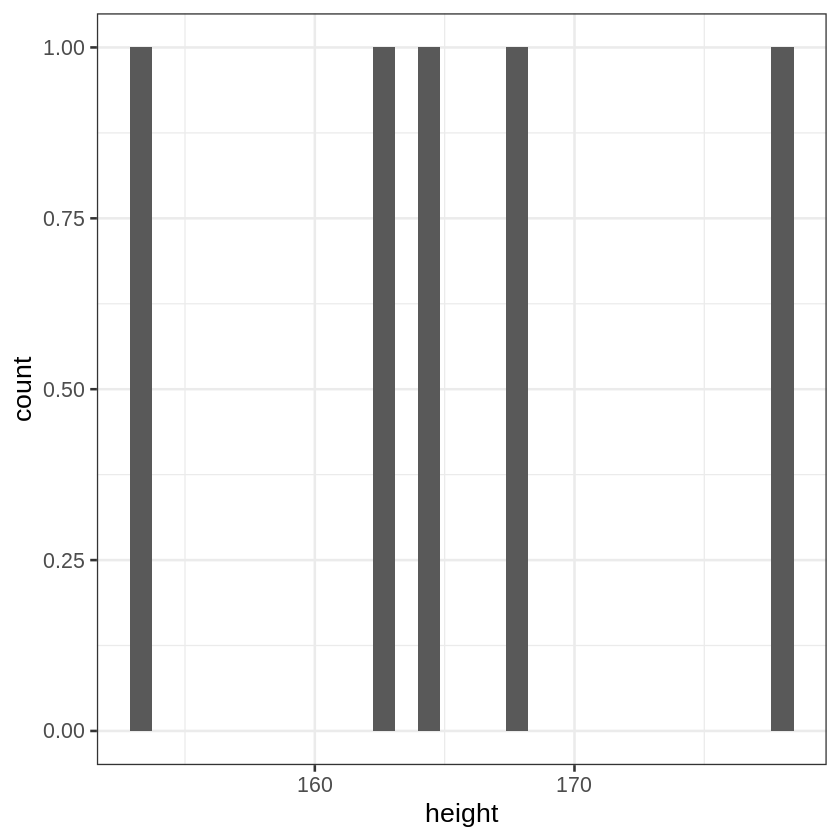

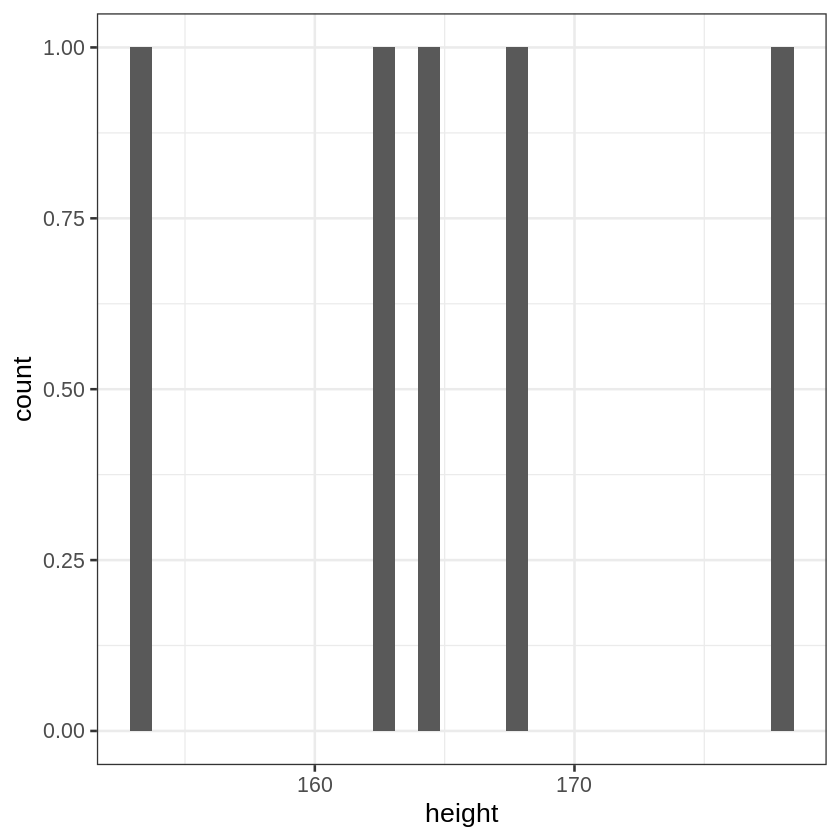

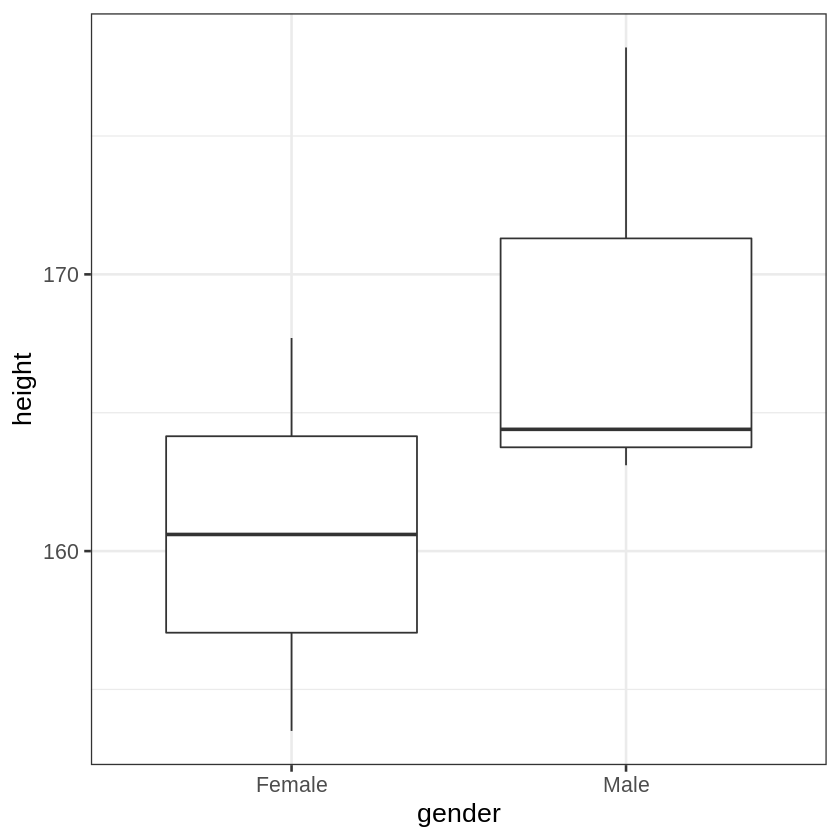

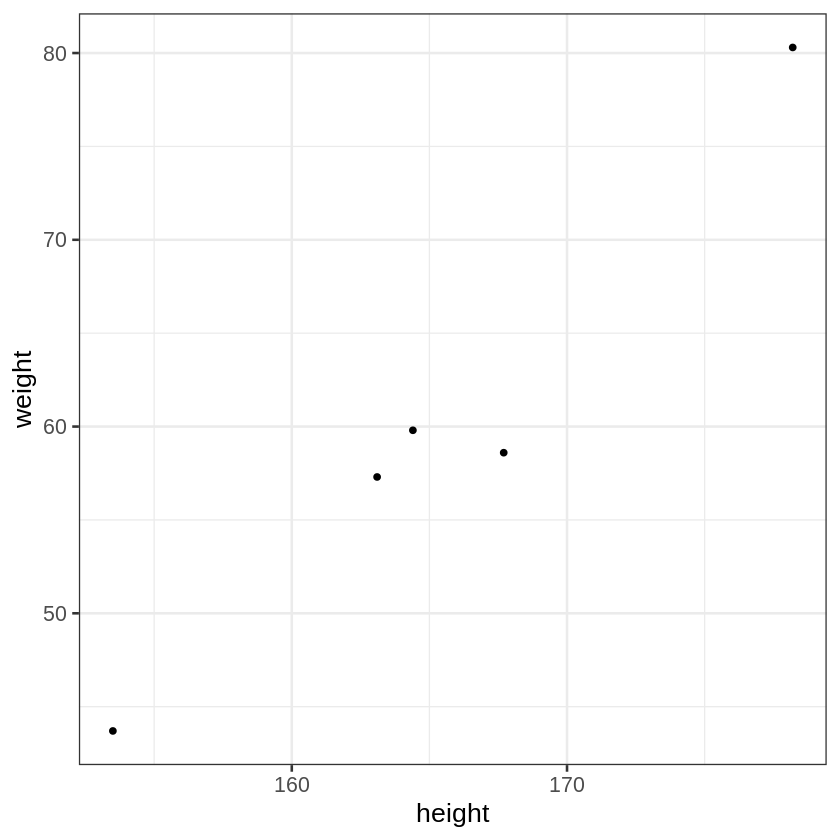

geom_smooth: na.rm = FALSE, se = TRUE
stat_smooth: na.rm = FALSE, se = TRUE, method = lm, formula = y ~ x
position_identity 

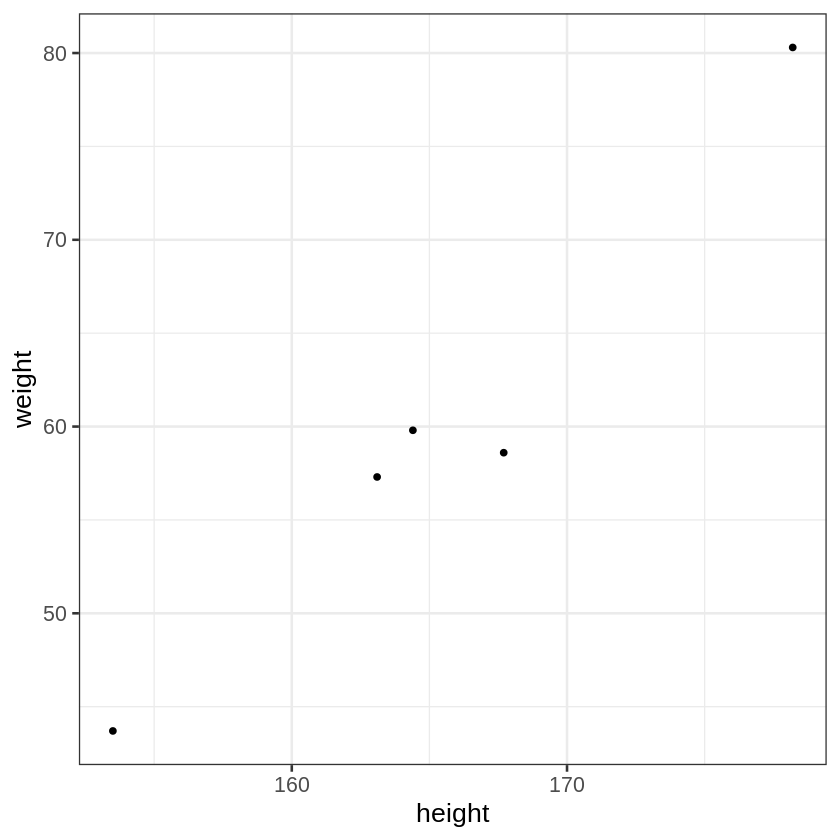

geom_smooth: na.rm = FALSE, se = TRUE
stat_smooth: na.rm = FALSE, se = TRUE, method = lm, formula = y ~ x
position_identity 

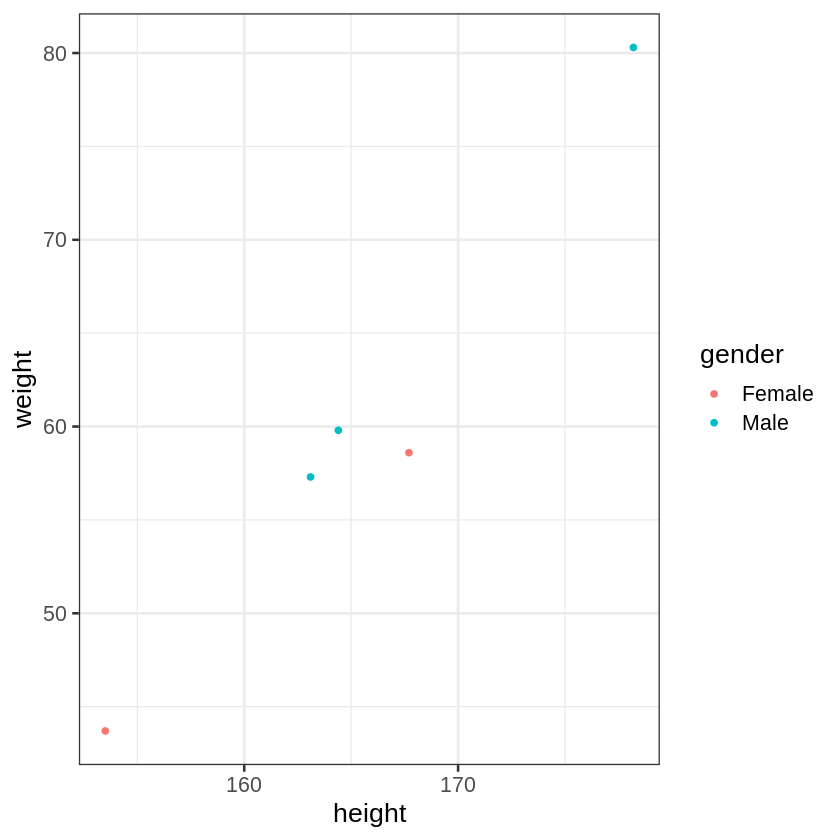

In [48]:
# ヒストグラムの描画
ggplot(body.data, aes(x=height)) +
    geom_histogram() +
    theme_bw(16) +
    ylab("count")

# 男女別に色分けしたヒストグラムの描画
ggplot(body.data, aes(x=height, fil=gender)) +
    geom_histogram() +
    theme_bw(16) +
    ylab("count")

# 身長データの箱ひげ図の実行
ggplot(body.data, aes(x=gender, y=height, fil=gender)) +
    geom_boxplot() +
    theme_bw(16)

# 身長と体重の散布図の実行
ggplot(body.data, aes(x=height, y=weight)) +
    geom_point() +
    theme_bw(16)

# 身長と体重の散布図+回帰曲線
ggplot(body.data, aes(x=height, y=weight)) +
    geom_point() +
    theme_bw(16)
    geom_smooth(method="lm")

# 身長と体重の散布図+回帰曲線
ggplot(body.data, aes(x=height, y=weight, col=gender)) +
    geom_point() +
    theme_bw(16)
    geom_smooth(method="lm")

In [51]:
# 相関係数の算出
# 全体
cor(body.data$height, body.data$weight)

# 男性
body.data.m <- body.data[body.data$gender=="Male",]
cor(body.data.m$height, body.data.m$weight)

# 女性
body.data.f <- body.data[body.data$gender=="Female",]
cor(body.data.f$height, body.data.f$weight)

[1] 0.9791898

[1] 0.9997697

[1] 1